<a href="https://colab.research.google.com/github/ShreyasSubhedar/Deep_Learning/blob/master/DL%23102/colab/DL_102Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron Model

In [0]:
#importing dataset of breast cancer
import sklearn.datasets
# importing numpy
import numpy as np
# importing pandas as pd
import pandas as pd
# import matplotlib for plotting graphs
import matplotlib.pyplot as plt
#imporing seaborn to give neet look 
import seaborn as sns
# importing metrics 
from sklearn.metrics import accuracy_score
#importing the train_test 
from sklearn.model_selection import train_test_split
sns.set()

In [0]:
class Perceptron:
  def __init__(self):
    self.w = None
    self.b= None

  def model(self,x):
    return 1 if (np.dot(self.w,x)>=self.b) else 0
  
  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y,epoch=1,learningRate=1):
    self.w= np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    maxAccuracy=0
    weightMatrix=[]
    for i in range(epoch):
      for x,y in zip(X,Y):
        Y_pred = self.model(x)
        if y==1 and Y_pred == 0:
          self.w = self.w + learningRate*x
          self.b = self.b + learningRate*1
        elif y==0 and Y_pred == 1:
          self.w = self.w - learningRate*x
          self.b = self.b - learningRate*1
      weightMatrix.append(self.w)
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(maxAccuracy<accuracy[i]):
        maxAccuracy = accuracy[i]
        checkPointW = self.w;
        checkPointB = self.b; 
    self.w = checkPointW
    self.b= checkPointB
    a = np.asarray(list(accuracy.values()))
    plt.plot(a)
    plt.show()
    return np.array(weightMatrix)

In [107]:
# Getting data to the varialble
breast_cancer = sklearn.datasets.load_breast_cancer()
# Creating data frame
data = pd.DataFrame(breast_cancer.data,columns= breast_cancer.feature_names)
Y = breast_cancer.target
# 1st parameter = data dataframe
# 2nd parameter = target dataframe
# 3rd parameter = 90% ttraining split 10% test split
# 4th parameter = deterministic split always give same o/p  
X_train, X_test, Y_train, Y_test = train_test_split(data,Y,test_size=0.1, stratify = Y ,random_state=1)
print(data.head())
#convert the dataframe to numpy arrays for calulation
X_test =X_test.values
X_train = X_train.values


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]


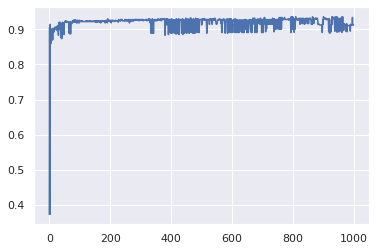

[[ 2.24435000e+02  4.17945000e+02  1.35838500e+03 ...  4.60700000e-01
   7.51435000e+00  2.96719500e+00]
 [ 3.60757000e+02  6.40635000e+02  2.17530500e+03 ... -1.76185000e-01
   1.12220000e+01  4.04884000e+00]
 [ 4.41086000e+02  7.64400000e+02  2.63701500e+03 ... -1.02939000e+00
   1.28346500e+01  4.54517500e+00]
 ...
 [ 9.56304750e+03  1.56219000e+03  2.81973150e+04 ... -1.06585262e+03
  -7.34202250e+02 -2.58278265e+02]
 [ 9.57334750e+03  1.57820000e+03  2.82311200e+04 ... -1.06690562e+03
  -7.34972300e+02 -2.58509410e+02]
 [ 9.58364750e+03  1.59421000e+03  2.82649250e+04 ... -1.06795863e+03
  -7.35742350e+02 -2.58740555e+02]]


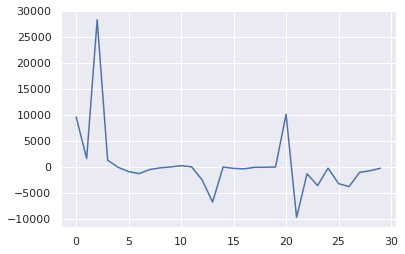

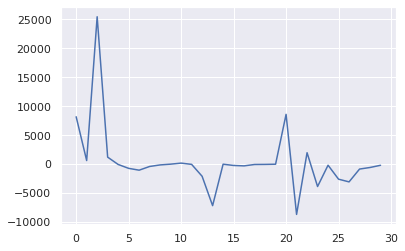


0.935546875
0.9122807017543859


In [108]:
perceptron =Perceptron()
weightMatrix= perceptron.fit(X_train,Y_train,1000,0.5)
print(weightMatrix)
plt.plot(weightMatrix[-1,:])
plt.show()
print()
plt.plot(perceptron.w.T)
plt.show()
print()
Y_pred = perceptron.predict(X_train)
print(accuracy_score(Y_pred,Y_train))
Y_pred = perceptron.predict(X_test)
print(accuracy_score(Y_pred,Y_test))

Animation for the understanding of how weights varies with epoch

In [109]:
#importing the different libraries to get the task done
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
print(weightMatrix.shape[1])

30


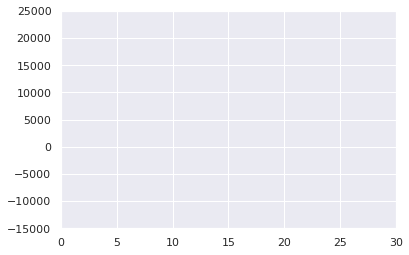

In [110]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, weightMatrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = np.array(list(range(weightMatrix.shape[1])))
    y = weightMatrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

In [113]:
#converting the whole prcoess to the html5video
HTML(anim.to_html5_video())
